# Implementing Flexible Fixture Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
user_colname = ['Age', 'Gender', 'Occupation']
df_user = pd.read_csv('/home/harish/PycharmProjects/Recommender_System/FMM/movie_data/users.dat',names = user_colname, sep = '\t')

In [3]:
df_user.head()

,Age,Gender,Occupation
0,24,M,technician
1,53,F,other
2,23,M,writer
3,24,M,technician
4,33,F,other


In [4]:
# 1000 MOVIE RATING MATRIX, each line/row is a user

In [5]:
df_item = pd.read_csv('/home/harish/PycharmProjects/Recommender_System/FMM/movie_data/movies.std', header = None, sep = '\t')

In [6]:
df_item.tail()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
495,0,0,0,0,0,0,4,0,0,5,...,0,0,0,0,0,0,0,0,0,0
496,4,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
497,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,4,5,0,0,...,0,0,0,0,0,0,0,0,0,0
499,4,0,4,0,0,0,0,4,4,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
# 1000 MOVIE names:

In [8]:
df_itemName= pd.read_csv('/home/harish/PycharmProjects/Recommender_System/FMM/movie_data/movies.cod', header = None, sep = '\t',encoding='latin-1')

In [9]:
df_itemName.head()

,0,1
0,0,Toy Story
1,1,GoldenEye
2,2,Four Rooms
3,3,Get Shorty
4,4,Copycat


In [10]:
#Training Procedure:

In [11]:
#Gmm EM:
from sklearn import mixture

In [12]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 10)# no. of mixture components
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_component in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_component,
                                      covariance_type=cv_type)
        gmm.fit(df_item)
        bic.append(gmm.bic(df_item))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [13]:
print(gmm)
print(gmm.means_)
import itertools
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=9, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)
[[ 2.28125     0.046875    0.421875   ...,  0.015625    0.03125     0.        ]
 [ 2.5         0.57142857  0.64285714 ...,  0.35714286  0.          0.        ]
 [ 1.54651163  0.04651163  0.1627907  ...,  0.02325581  0.          0.        ]
 ..., 
 [ 0.51690821  0.04830918  0.         ...,  0.          0.00966184  0.        ]
 [ 3.29166667  2.16666667  1.41666667 ...,  0.29166667  0.33333333
   0.54166667]
 [ 2.97222222  1.16666667  0.625      ...,  0.          0.16666667
   0.15277778]]


In [19]:
# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)



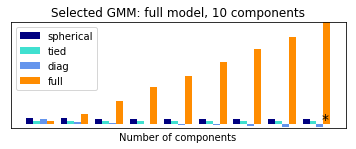

In [20]:
plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 10 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

In [16]:
# # Trying with K means Clustering: EM
# from sklearn.cluster import KMeans
# k=5

# kmeans = KMeans(n_clusters=k)
# kmeans.fit(df_item,)

# labels = kmeans.labels_
# centroids = kmeans.cluster_centers_

# pd.set_option('display.max_rows', df_item.describe().shape[1])
# pd.DataFrame(centroids)

# for i in range(k):
#     cluster_members = df_item[labels==i]
#     print('cluster',str(i+1),'size: ', cluster_members.shape[0])